## Part 1. Analysis of the Company's Performance Over 5 Years

**Note:** All financial values in this project are expressed in **thousands of US dollars ($K)**.

We will analyze the financial condition of the company *Technoprom Ltd.* over the past five years in order to identify possible causes of crisis and understand the dynamics of key financial indicators.

To begin, we load the company's financial data from the CSV file `techno_prom_financials.csv` into a DataFrame using the **pandas** library.  
**Pandas** is a powerful tool for working with tabular data, allowing us to efficiently process large datasets and prepare them for further analysis and visualization.

Thus, at this initial stage, we obtain the raw data required for our further financial analysis.


In [10]:
# Import the pandas library with the alias 'pd'
import pandas as pd

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('C:/Palina/IT/Data Cloud Engineer COURSERA/My Projects/BankruptcyAnalysis/techno_prom_financials.csv')

# Display the table for a preliminary overview
df


,Indicator,Year 1,Year 2,Year 3,Year 4,Year 5
0,Revenue,520,470,410,360,320
1,COGS,290,300,310,320,330
2,Gross_Profit,230,170,100,40,-10
3,Administrative_Expenses,60,70,85,95,100
4,Marketing_PR,20,30,45,50,55
5,EBITDA,150,70,-30,-105,-165
6,Depreciation,25,30,35,40,40
7,Loan_Interest,15,20,30,40,50
8,Other_Expenses,10,15,20,30,35
9,Net_Profit,100,5,-115,-215,-290


Next, we will analyze the dynamics of the company's key indicators by calculating their 5-year percentage change.
This will help us quickly assess which areas of the company’s operations have improved, which have deteriorated, and identify major trends of growth or decline.

To perform these calculations, we will use the NumPy library.   
***NumPy*** is a powerful tool for fast numerical computations. Its main advantages are high performance and convenient handling of numerical arrays.

In [24]:
# Import the NumPy library
import numpy as np

# Add a column with the 5-year percentage change, rounded to 1 decimal place
df['Change_5Y (%)'] = np.round(((df['Year 5'] - df['Year 1']) / df['Year 1']) * 100, 1)

# Display a table with selected columns: indicator name, values for Year 1 and Year 5, and the calculated change
df[['Indicator', 'Year 1', 'Year 5', 'Change_5Y (%)']]


,Indicator,Year 1,Year 5,Change_5Y (%)
0,Revenue,520,320,-38.5
1,COGS,290,330,13.8
2,Gross_Profit,230,-10,-104.3
3,Administrative_Expenses,60,100,66.7
4,Marketing_PR,20,55,175.0
5,EBITDA,150,-165,-210.0
6,Depreciation,25,40,60.0
7,Loan_Interest,15,50,233.3
8,Other_Expenses,10,35,250.0
9,Net_Profit,100,-290,-390.0


We will visualize the changes in the company’s key indicators using the basic Matplotlib library.   
***Matplotlib*** is a versatile tool for creating charts and visualizing data in Python.   

We will build a bar chart to clearly display the dynamics of changes in the main financial indicators over the 5-year period.

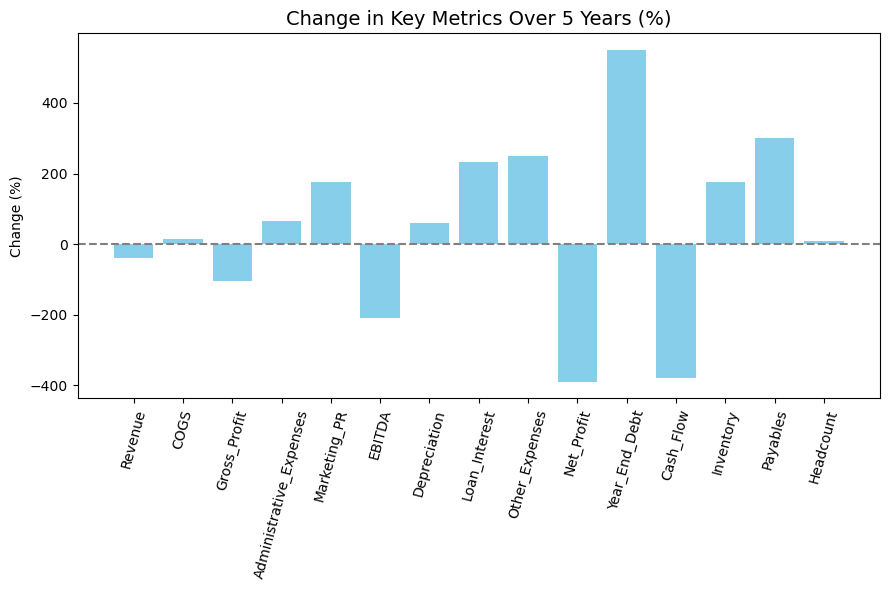

In [40]:
# Importing the visualization library
import matplotlib.pyplot as plt

# Set the figure size (width x height)
plt.figure(figsize=(9, 6))  

# Create a bar chart
plt.bar(df['Indicator'], df['Change_5Y (%)'], color='skyblue')  

# Horizontal line at 0% — separates growth from decline
plt.axhline(0, color='gray', linestyle='--') 

# Add chart title with increased font size
plt.title('Change in Key Metrics Over 5 Years (%)', fontsize=14)

# Label for Y-axis
plt.ylabel('Change (%)') 

# Rotate X-axis labels for better readability
plt.xticks(rotation=75)  

# Automatically adjust layout to fit everything
plt.tight_layout()  

# Display the chart
plt.show()


## Conclusions Based on the Company’s Performance Analysis
The financial indicators of TechnoProm Ltd. over the five-year period show a significant deterioration in most key areas, pointing to a growing financial crisis.

### Revenue and Profitability
***Revenue*** decreased by 38.5%, indicating a decline in business scale or market share loss.   
***Gross Profit*** dropped by 104.3%, entering a negative zone — a sign of serious operational issues.   
***Net Profit*** fell by 390%, reflecting deep unprofitability.   
***EBITDA*** declined by 210%, demonstrating a sharp drop in operational efficiency.   
***Operating Cash Flow*** decreased by 377.8%, raising concerns about potential insolvency.

### Costs and Expenses
***Cost of Goods Sold (COGS)*** rose by 13.8%, despite falling revenue, which significantly reduced margins.   
***Administrative Expenses*** increased by 66.7%, and ***Marketing & PR*** expenses surged by 175%, suggesting possibly ineffective growth investments.                     
***Loan Interest*** rose by 233.3%, and ***Other Expenses*** by 250%, indicating growing debt burden and additional financial losses.      
***Depreciation*** increased by 60%, which could be due to asset revaluation, changes in depreciation methods, or reduced useful life of assets during decline.

### Balance Sheet and Assets
***Year-End Debt*** grew by 550%, posing a serious threat to financial stability.   
***Inventory*** rose by 175%, and ***Payables*** by 300%, possibly reflecting turnover and liquidity issues.   
***Headcount*** remained nearly unchanged (+8.3%) despite financial decline, which may point to inefficient resource allocation.

Thus, based on this part of the analysis, we observe that TechnoProm Ltd. has shifted from a profitable business model to a deeply unprofitable one over the past five years.
The decline in revenue, rising expenses, falling profits, and a significant increase in debt all point to a crisis in the company’s overall business strategy.

## Part 2. Expense Structure Analysis
At the next stage, we analyze the company’s expense structure for the final year (Year 5) — a period when the business was already in a crisis phase.
This allows us to focus on the current distribution of costs and identify the key spending areas.

We highlight the main expense categories and calculate their share in the total cost structure. This type of analysis helps to:

- Understand where the majority of funds are being spent;

- Identify potential sources of inefficiency;

- Determine the priority areas for budget optimization and cost restructuring.

The results will be visualized to provide a clear picture of the company’s current financial structure.

In [19]:
# Select the expense categories for analysis
expense_rows = [
    'COGS',                    # Cost of Goods Sold    
    'Administrative_Expenses', # Administrative Expenses
    'Marketing_PR',            # Marketing and PR
    'Depreciation',            # Depreciation
    'Loan_Interest',           # Loan Interest
    'Other_Expenses'           # Other Expenses
]

# Filter the table by selected expense categories and keep only Year 1 and Year 5
expense_data = df[df['Indicator'].isin(expense_rows)][['Indicator', 'Year 1', 'Year 5']].copy()

# Extract Year 5 values as a NumPy array
values = expense_data['Year 5'].values                                    # array([330, 100,  55,  40,  50,  35], dtype=int64)

# Calculate the total expenses for Year 5
total = np.sum(values)                                                    # 610

# Calculate the share (%) of each expense category in total expenses, rounded to 1 decimal place
proportions = np.round((values / total) * 100, 1)                         # array([54.1, 16.4,  9.0,  6.6,  8.2,  5.7])

# Add a new column with the calculated shares
expense_data['Share (%)'] = proportions

# Reset the index for a cleaner display
expense_data.reset_index(drop=True, inplace=True)

# Display the final table with expense distribution
expense_data


,Indicator,Year 1,Year 5,Share (%)
0,COGS,290,330,54.1
1,Administrative_Expenses,60,100,16.4
2,Marketing_PR,20,55,9.0
3,Depreciation,25,40,6.6
4,Loan_Interest,15,50,8.2
5,Other_Expenses,10,35,5.7


We will create a pie chart using Matplotlib to visually represent the share of each major expense category in Year 5.
This will help us quickly see where most of the money is being spent and highlight the key cost drivers.

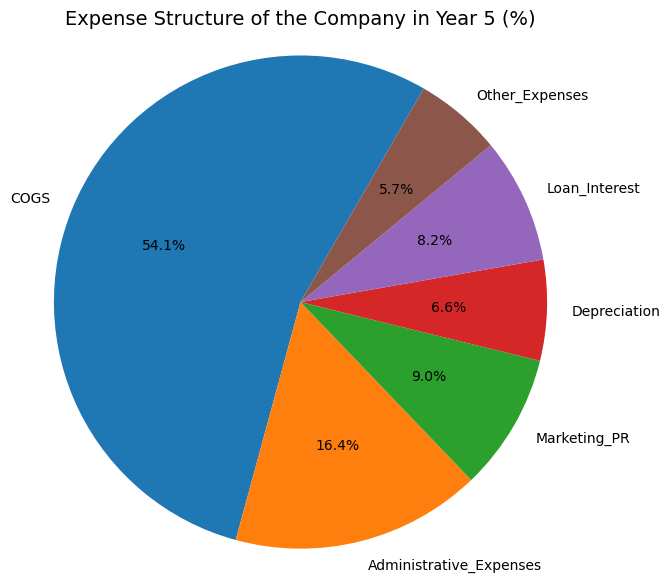

In [41]:
# Create the figure
plt.figure(figsize=(7, 7))  # Set the figure size (width x height)

# Plot the pie chart: show percentages with 1 decimal point, and set starting angle to 60 degrees
plt.pie(expense_data['Share (%)'], 
        labels=expense_data['Indicator'], 
        autopct='%1.1f%%', 
        startangle=60)

# Add chart title with increased font size
plt.title('Expense Structure of the Company in Year 5 (%)', fontsize=14)

# Set equal aspect ratio to ensure the pie chart is perfectly circular
plt.axis('equal')  

# Display the chart
plt.show()


## Conclusions on Expense Dynamics and Structure (in $K)
Over the past 5 years, TechnoProm Ltd.'s expenses have significantly increased across all major categories.
This may indicate a lack of cost control and inefficient resource management policies.

***Cost of Goods Sold (COGS)*** increased from 290 to $330K, representing 54.1% of total expenses.
This is the company's largest expense category, and its growth amid declining revenue reduces profit margins and suggests problems in the production process or purchasing strategy.

***Administrative Expenses*** rose from 60 to $100K, representing 16.4%.
This increase in management costs without visible returns in revenue points to possible overstaffing or inefficient administrative operations.

***Marketing and PR*** costs nearly tripled — from 20 to $55K, representing 9%.
This implies a poor return on marketing investment and potential misallocation of funds.

***Loan Interest*** and ***Depreciation*** made up 8.2% and 6.6% of total expenses, respectively.
These figures highlight a growing debt burden and rising asset maintenance costs.

***Other Expenses*** grew 3.5 times — from 10 to $35K, representing 5.7%.
This requires additional investigation and clarification.

In conclusion, the expense structure of TechnoProm Ltd. during the crisis period is characterized by growth across all major areas, especially in administrative and marketing costs.
This expansion was not supported by revenue or profit growth, which indicates poor financial management and a strained business model.
These trends warrant a deeper review of operational efficiency and strategic budget allocation.

To better understand the reasons behind the growing expense burden and declining efficiency, we will now examine the dynamics of revenue and operating costs.
This will allow us to assess how key income and cost indicators have changed over time and how these trends have affected the company's financial condition.

## Part 3. Analysis of Revenue and Operating Expenses
To assess the changes in the financial position of TechnoProm Ltd. over the past 5 years, we will analyze the dynamics of revenue and key expenses — specifically, the cost of goods sold (COGS), administrative expenses, and marketing & PR costs.
This analysis is based not on formal accounting categories, but on the actual operational burden, providing a more accurate view of where the company's funds are truly being spent in the course of its core operations.

This comparison will help to:
- trace the relationship between income and expenses over time;
- identify the point at which expenses exceeded revenue;
- detect imbalances in the expense structure.

In [15]:
# Define an array with the names of the years
years = np.array(['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])          # array(['Year 1', ..., 'Year 5'], dtype='<U6')

# Extract revenue values by year
revenue = df[df['Indicator'] == 'Revenue'].iloc[0, 1:6].values                # array([520, 470, 410, 360, 320], dtype=object)

# Extract expense values by category: COGS, Administrative, Marketing
cogs = df[df['Indicator'] == 'COGS'].iloc[0, 1:6].values                      # array([290, 300, 310, 320, 330], dtype=object)
admin = df[df['Indicator'] == 'Administrative_Expenses'].iloc[0, 1:6].values  # array([60, 70, 85, 95, 100], dtype=object)
marketing = df[df['Indicator'] == 'Marketing_PR'].iloc[0, 1:6].values         # array([20, 30, 45, 50, 55], dtype=object)

# Sum up the three categories to get total operating expenses
total_expenses = cogs + admin + marketing                                      # array([370, 400, 440, 465, 485], dtype=object)

# Create a summary table with results by year
data = {
    'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'],
    'Revenue': revenue,
    'Total_Operating_Expenses': total_expenses
}
df_summary = pd.DataFrame(data)
df_summary


,Year,Revenue,Total_Operating_Expenses
0,Year 1,520,370
1,Year 2,470,400
2,Year 3,410,440
3,Year 4,360,465
4,Year 5,320,485


We will visualize the analysis results in the chart "Revenue and Operating Expenses by Year" to highlight the increasing burden on the business model.


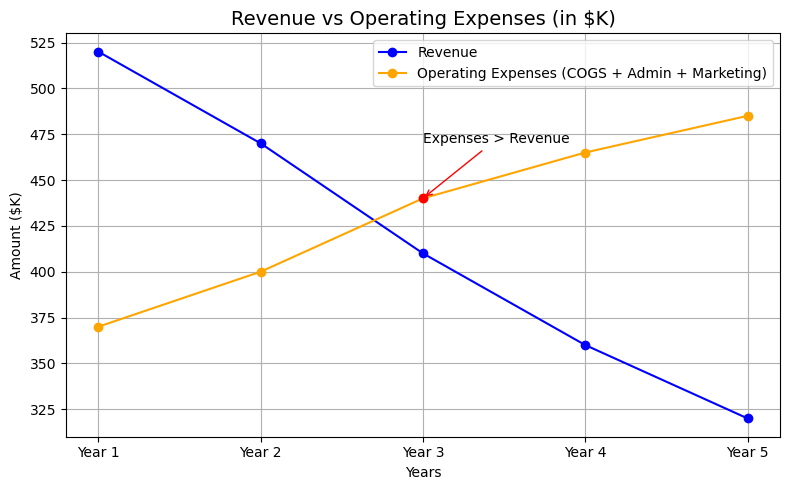

In [49]:
# Plotting the chart
plt.figure(figsize=(8, 5))  # Chart size (width x height)

# Revenue line
plt.plot(years, revenue, marker='o', label='Revenue', color='blue')

# Operating expenses line
plt.plot(years, total_expenses, marker='o', label='Operating Expenses (COGS + Admin + Marketing)', color='orange')

# Add a red dot in the year when expenses exceeded revenue (Year 3)
plt.plot('Year 3', total_expenses[2], 'ro')  # Red point on Year 3

# Add an annotation (label with an arrow) to this point
plt.annotate('Expenses > Revenue',
             xy=('Year 3', total_expenses[2]),
             xytext=('Year 3', total_expenses[2] + 30),
             arrowprops=dict(arrowstyle='->', color='red'))

# Add chart title with increased font size
plt.title('Revenue vs Operating Expenses (in $K)', fontsize=14)
plt.xlabel('Years')
plt.ylabel('Amount ($K)')

# Display legend and grid
plt.legend()
plt.grid(True)

# Improve layout spacing
plt.tight_layout()

# Show the plot
plt.show()


## Conclusions on Revenue and Operating Expenses Analysis
The company's ***revenue*** declined from 520 in Year 1 to $320K in Year 5 — a 38% decrease.   

***Total operating expenses*** (COGS, administrative, and marketing costs) increased from 370 to $485K, marking a 31% rise.

This divergence between falling revenue and rising expenses indicates that the company has failed to adjust its cost structure in response to declining income. As a result, operational efficiency has decreased, and financial pressure has intensified.

By Year 3, expenses had already exceeded revenue — this trend is clearly visible on the chart. It reflects a significant deterioration in the company's financial position and increased risks to the sustainability of its business model.

Now, to better understand the reasons behind the company’s financial deterioration, we will examine the dynamics of two key financial indicators — net profit and debt load over the same period.
Analyzing the trends in these metrics will help identify potential insolvency risks and assess the overall financial stability of the business.

## Part 4. Dynamics of Net Profit and Debt Load
In this section, we examine the changes in net profit and year-end debt over the past 5 years.

Analyzing these key indicators helps assess the financial condition of the company, identify trends in profitability and debt burden. This is essential for understanding how the increase in debt affects the company’s ability to generate profit and maintain solvency.

If net profit declines while debt continues to grow, it signals financial instability and an increased risk of insolvency or bankruptcy.




In [32]:
# Extract net profit values for each year and convert to float
net_profit = df[df['Indicator'] == 'Net_Profit'].iloc[0, 1:6].values.astype(float)     # array([ 100.0,    5.0, -115.0, -215.0, -290.0])

# Extract year-end debt values and convert to float
debt = df[df['Indicator'] == 'Year_End_Debt'].iloc[0, 1:6].values.astype(float)        # array([ 80.0, 150.0, 250.0, 380.0, 520.0])         

# Create a summary table with yearly results
data1 = {
    'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'],
    'Net_Profit': net_profit,
    'Year_End_Debt': debt
}
df_summary1 = pd.DataFrame(data1)
df_summary1


,Year,Net_Profit,Year_End_Debt
0,Year 1,100.0,80.0
1,Year 2,5.0,150.0
2,Year 3,-115.0,250.0
3,Year 4,-215.0,380.0
4,Year 5,-290.0,520.0


To visualize the trends, we will create a chart titled “Net Profit and Year-End Debt Dynamics”

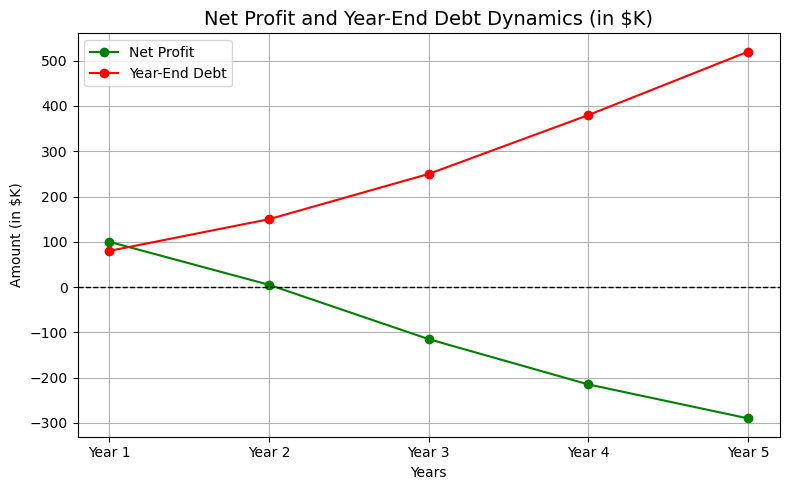

In [48]:
# Define the list of years for the X-axis
years = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']

# Create the figure with a specified size
plt.figure(figsize=(8, 5))

# Plot Net Profit: points with 'o' marker, green color, labeled in the legend
plt.plot(years, net_profit, marker='o', label='Net Profit', color='green')

# Plot Year-End Debt: points with 'o' marker, red color, labeled in the legend
plt.plot(years, debt, marker='o', label='Year-End Debt', color='red')

# Add chart title with increased font size
plt.title('Net Profit and Year-End Debt Dynamics (in $K)', fontsize=14)

# X-axis label
plt.xlabel('Years')

# Y-axis label
plt.ylabel('Amount (in $K)')

# Add a horizontal dashed line at y=0 to visualize the profit/loss threshold
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Display the legend for the lines
plt.legend()

# Enable grid for better readability
plt.grid(True)

# Automatically adjust spacing for a neat layout
plt.tight_layout()

# Show the chart
plt.show()


## Conclusions on the Dynamics of Net Profit and Debt Load
Over the 5-year period, the company's ***net profit*** declined from 100 in Year 1 to a loss of $-290K in Year 5. 

Meanwhile, ***year-end debt*** rose from 80 to $520K — an increase of more than sixfold.

The situation became particularly critical starting from Year 3, when net profit turned negative for the first time, while debt continued to grow rapidly.

This combination of rising debt and declining profitability indicates a serious deterioration in the company's financial condition, increases the risk of insolvency, and threatens the sustainability of its business model.

Next, we will proceed to calculate key financial ratios to further evaluate the company's profitability, efficiency, and financial stability.

## Part 4. Calculation of Key Financial Ratios
We now turn to assessing the company's operational efficiency and profitability using key financial ratios.
Despite the current losses, analyzing these indicators allows for a deeper understanding of how effectively resources are being utilized and which areas of the business require special attention.

The following ratios will be calculated in this section:
- ***Gross Profit Margin*** — the share of gross profit in revenue, reflecting the basic profitability of products or services;
- ***Operating Margin*** — shows how much profit remains after operating expenses (excluding interest and taxes);
- ***Net Profit Margin*** — reflects the overall effectiveness of the company's operations.

These indicators will help identify weaknesses in the financial model and determine priority areas for strategic adjustment, in order to stabilize the business and set it on a path to recovery.

In [44]:
# Create a dictionary-like DataFrame for easy access to rows by indicator (index by 'Indicator' column)
ind = df.set_index('Indicator')

# Extract 5-year values for key indicators

# Revenue over 5 years
revenue = ind.loc['Revenue'].iloc[:5].values                  
# Example output: array([520.0, 470.0, 410.0, 360.0, 320.0])

# Gross Profit over 5 years
gross_profit = ind.loc['Gross_Profit'].iloc[:5].values        
# Example: array([230.0, 170.0, 100.0, 40.0, -10.0])

# Operating Profit = Gross Profit - Administrative Expenses - Marketing & PR
op_profit = (                                                 
    gross_profit                                              
    - ind.loc['Administrative_Expenses'].iloc[:5].values      
    - ind.loc['Marketing_PR'].iloc[:5].values                 
)
# Example: array([150.0, 70.0, -30.0, -105.0, -165.0])

# Net Profit over 5 years
net_profit = ind.loc['Net_Profit'].iloc[:5].values            
# Example: array([100.0, 5.0, -115.0, -215.0, -290.0])

# Calculate profitability ratios in percentages (rounded to 1 decimal)

# Gross Profit Margin = Gross Profit / Revenue
gpm = np.round((gross_profit / revenue) * 100, 1)             
# Example: array([44.2, 36.2, 24.4, 11.1, -3.1])

# Operating Margin = Operating Profit / Revenue
opm = np.round((op_profit / revenue) * 100, 1)                
# Example: array([28.8, 14.9, -7.3, -29.2, -51.6])

# Net Profit Margin = Net Profit / Revenue
npm = np.round((net_profit / revenue) * 100, 1)               
# Example: array([19.2, 1.1, -28.0, -59.7, -90.6])

# Create a summary table with results by year
pd.DataFrame({
    'Year': [1, 2, 3, 4, 5],
    'Gross Profit Margin (%)': gpm,
    'Operating Margin (%)': opm,
    'Net Profit Margin (%)': npm
})


,Year,Gross Profit Margin (%),Operating Margin (%),Net Profit Margin (%)
0,1,44.2,28.8,19.2
1,2,36.2,14.9,1.1
2,3,24.4,-7.3,-28.0
3,4,11.1,-29.2,-59.7
4,5,-3.1,-51.6,-90.6


## 📊 What Do Financial Margins Indicate and What Are Acceptable Benchmarks?
Financial ratios help assess ***the profitability and efficiency*** of a business. Below are three key indicators calculated for the reporting period:

| **Metric**              | **What It Indicates**                                     | **Formula**                                   | **Benchmark Value**        |
|-------------------------|-----------------------------------------------------------|-----------------------------------------------|-----------------------------|
| **Gross Profit Margin** | Gross profitability — how much remains after COGS         | Gross Profit / Revenue                        | **> 30%** — strong margin   |
| **Operating Margin**    | Operating profitability — profit after operating expenses | (Gross Profit – Operating Expenses) / Revenue | **> 10%** — stable          |
| **Net Profit Margin**   | Net profitability — overall business profitability        | Net Profit / Revenue                          | **> 5–10%** — acceptable    |

💡 If these indicators are negative, it means the company is experiencing losses, inefficiency, and potential risk of bankruptcy.

In our case:
- Gross profit margin is negative → cost of goods sold exceeds revenue.
- Operating and net profit margins are also below zero.
- This means the company is unable to cover its costs and is therefore in deep financial crisis.

To visualize the trends, we will present a chart showing the changes in gross, operating, and net profit margins over the 5-year period.
This will help illustrate how the company's efficiency evolved over time and identify the point at which a sharp decline began.

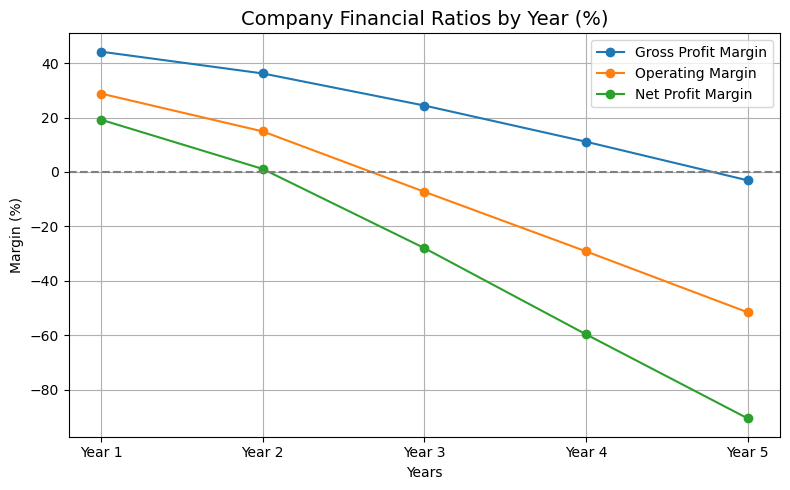

In [47]:
# Define the list of years for the X-axis
years = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']

# Create a figure and set the chart size
plt.figure(figsize=(8, 5))

# Plot the line for Gross Profit Margin
plt.plot(years, gpm, marker='o', label='Gross Profit Margin')

# Plot the line for Operating Margin
plt.plot(years, opm, marker='o', label='Operating Margin')

# Plot the line for Net Profit Margin
plt.plot(years, npm, marker='o', label='Net Profit Margin')

# Add the chart title with increased font size
plt.title('Company Financial Ratios by Year (%)', fontsize=14)

# Axis labels
plt.xlabel('Years')
plt.ylabel('Margin (%)')

# Add a horizontal line at 0% to separate profit from loss
plt.axhline(0, color='gray', linestyle='--')

# Add a legend to distinguish the lines
plt.legend()

# Enable the grid for better readability
plt.grid(True)

# Automatically adjust layout to fit all elements
plt.tight_layout()

# Display the chart
plt.show()


## Conclusions on the Company's Financial Margins Over 5 Years
Over the analyzed period, there is a clear and sharp deterioration in the company's key profitability indicators:
- ***Gross Profit Margin*** dropped from 44.2% in Year 1 to negative values — –3.1% in Year 5. This indicates that the company is no longer covering the cost of its products, losing profitability at the most basic level.
- ***Operating Margin*** fell from a healthy 28.8% to a deep loss of –51.6% in the final year. This trend shows that operating expenses have significantly exceeded operating income, turning the core business operations unprofitable.
- ***Net Profit Margin*** decreased from a positive 19.2% to a massive loss of –90.6%, indicating that the company’s total losses exceeded its revenue by nearly two times.

📉 ***Conclusion***
The sharp and consistent decline across all major financial margins reflects a deep crisis within the company. The negative values in recent years are a clear signal of effective bankruptcy: expenses and debt obligations far exceed income, threatening the company’s financial stability and continued existence.
Without a radical change in strategy and cost management, the company risks facing serious issues with debt servicing and further financial deterioration.


## Final Analysis of the Company’s Financial Condition
The financial analysis over the past five years has revealed serious issues and a persistent negative trend:
- Revenue declined by nearly 40%, indicating a loss of market share, reduced demand, or the departure of key clients.
- Net profit turned negative and dropped almost fourfold, showing that the company is consistently generating losses.
- Cost of goods sold (COGS) increased despite falling revenue, pointing to a decline in operational efficiency.
- Debt burden grew nearly sixfold, highlighting high dependency on external financing and risks related to debt servicing.
- Administrative and marketing expenses continue to rise but do not lead to revenue growth, indicating inefficient spending.
- All key profitability margins — gross, operating, and net — are rapidly declining and have turned negative, confirming a deep business crisis.

## Key Hypotheses Behind the Financial Deterioration:
- Loss of clients and contracts, declining demand, and increasing competition.
- Inefficient cost management, ineffective marketing campaigns, and lack of budget control.
- Aggressive borrowing to cover operating losses and insufficient solvency.

## Recommendations for Overcoming the Crisis:
- Optimize expenses, especially administrative and marketing costs; eliminate inefficient spending.
- Review cost of goods sold (COGS) through supply chain audits and improvements in operational processes.
- Restructure existing debt — negotiate with creditors and avoid new borrowing until stabilization.
- Focus on profitable products and services, and shut down unprofitable business lines.
- Implement strict financial control and analytics to enable timely and data-driven decision-making.

## Conclusion
The company is in a state of financial crisis, facing a high risk of bankruptcy if the current management model persists.
Only a comprehensive transformation of business processes, improvement in operational efficiency, and strict financial discipline can help stabilize the situation and pave the way toward sustainable growth.
